# Laboratorio #5. Análisis de Fourier.

**Estudiante: Luna Katalina Quintero Jiménez, T00068464.**

**I. Introducción.**

Este informe se centra en el análisis de señales periódicas y no periódicas utilizando Python. En la primera parte, exploramos el espectro de señales periódicas, utilizando las librerías NumPy, SciPy y Matplotlib para generar, manipular y graficar señales. A través de la implementación de la serie de Fourier, analizamos una señal Dirichlet y una nota musical de un violonchelo, extrayendo información valiosa sobre sus características en el dominio de la frecuencia. En la segunda parte, nos adentramos en el espectro de señales no periódicas, utilizando la librería SymPy para trabajar con objetos simbólicos y calcular transformadas de Fourier. A través de este análisis, fue posible observar cómo ciertas modificaciones en las señales afectan sus espectros de frecuencia.

**II. Marco teórico.**

**Series de Fourier.**

Este contexto de series y transformadas de Fourier implica la elaboración de una forma de representar señales mediante la combinación lineal de un conjunto de señales fundamentales. Para esta forma alternativa de representación, empleamos exponenciales complejas. Las representaciones obtenidas se conocen como series y transformadas de Fourier tanto en el dominio continuo como en el discreto. Estas representaciones pueden ser útiles para construir diversas y prácticas clases de señales.

El conjunto de frecuencias presentes en las señales periódicas es finito y consiste en las componentes armónicas de la frecuencia base.
Las representaciones en serie de Fourier poseen una serie de propiedades importantes que son útiles para desarrollar ideas conceptuales sobre dichas representaciones, y también pueden ayudar a reducir la complejidad de la evaluación de las series de Fourier de muchas señales.

De las propiedades seleccionadas, nos resultará de una señal periódica y sus coeficientes de la serie de Fourier. En concreto, supongamos que x(t) es una señal periódica con periodo T y frecuencia fundamental w0 = 2π/T. [1]

**Transformada de Fourier.**

Las transformaciones y los filtros son instrumentos empleados para el tratamiento y la evaluación de datos discretos, y son comúnmente empleados en aplicaciones de procesamiento de señales y matemáticas computacionales. Cuando los datos se expresan en función del tiempo o el espacio, la transformada de Fourier desglosa dichos datos en componentes de frecuencia.

La transformada de Fourier se emplea principalmente para analizar señales no periódicas y esta es una expresión matemática que convierte una señal muestreada en el dominio temporal o espacial en la misma señal muestreada en el dominio de la frecuencia temporal o espacial. En el ámbito del procesamiento de señales, esta transformada puede revelar aspectos significativos de una señal, como sus componentes de frecuencia. Se define la transformada de Fourier para un vector x compuesto por puntos n muestreados de manera uniforme por
yk+1=n−1∑j=0ωjkxj+1.

ω=e−2πi/n es una de n raíces complejas de unidad donde i es la unidad imaginaria. Para x e y, los índices j y k oscilan entre 0 y n−1. [2]

**Magnitud y fase.**

Las gráficas de magnitud y fase son dos componentes esenciales en la representación de las Transformadas de Fourier. La gráfica de magnitud muestra la amplitud de cada componente de frecuencia en la señal, indicando cuán “fuerte” o “prominente” es cada frecuencia. Por otro lado, la gráfica de fase proporciona información sobre el desfase de cada componente de frecuencia, es decir, cuánto se ha “desplazado” cada frecuencia con respecto a su posición original. Ambas gráficas son esenciales para entender completamente la naturaleza de una señal en el dominio de la frecuencia. [3]

Además de la magnitud y la fase, es importante entender que la Transformada de Fourier también puede proporcionar información sobre la energía de la señal. La energía de una señal se puede calcular como el cuadrado de la magnitud de su Transformada de Fourier. Esto puede ser útil para identificar las componentes de frecuencia que contribuyen más a la energía total de la señal.

Además, la Transformada de Fourier es una herramienta poderosa para el análisis espectral. El espectro de una señal es simplemente la representación de la señal en el dominio de la frecuencia, que se obtiene a través de la Transformada de Fourier. El espectro puede revelar características ocultas de la señal que no son evidentes en el dominio del tiempo.
Finalmente, es importante mencionar que la Transformada de Fourier es una transformación lineal.

Esto significa que la Transformada de Fourier de una combinación lineal de señales es igual a la combinación lineal de las Transformadas de Fourier de las señales individuales. [4]


**III. Procedimiento.**

**Parte 1. Espectro de señales periódicas.**

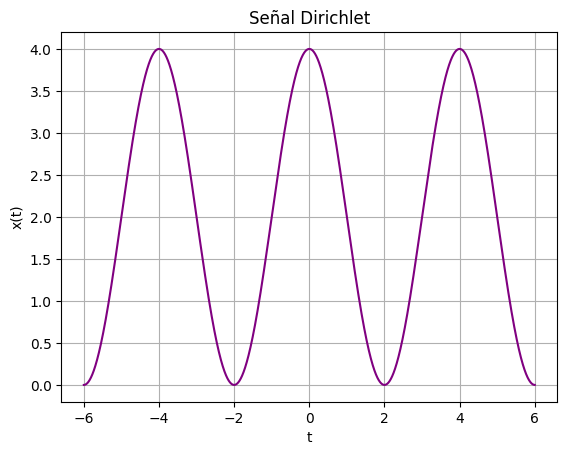

In [18]:
import math
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy import special

#Esta señal Dirichlet va desde 0 a 4 dado que su amplitud es 4.
#empieza desde 0
t = np.arange(-6,6,0.001) #vector tiempo definido de 0 hasta 10 con pasos de 0.001.
x = special.diric(np.pi*t,2)*2+2 #señal continua Dirichlet, desplazada verticalmente con el +2.
plt.figure()
plt.plot(t,x, color="purple")
plt.xlabel('t'), plt.ylabel('x(t)')
plt.grid()
plt.title("Señal Dirichlet")
plt.show()

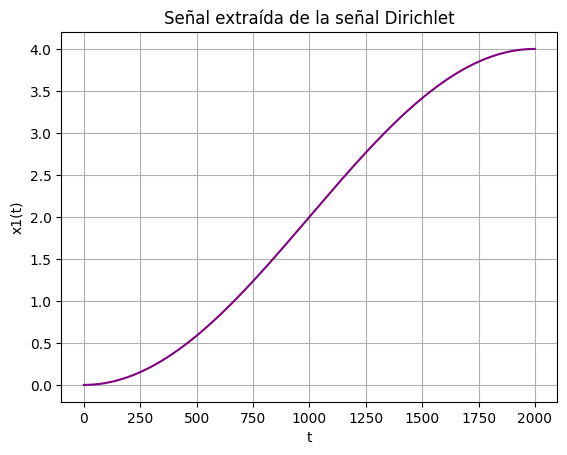

In [19]:
#Extraiga un período de la señal 𝑥(𝑡) en un nuevo vector x1
x1 = x[:2*1000] #periodo multiplicado con la frecuencia
plt.plot(x1, color="purple") #no es necesario poner el eje x
plt.xlabel('t'), plt.ylabel('x1(t)')
plt.grid()
plt.title("Señal extraída de la señal Dirichlet")
plt.show()

Text(0.5, 1.0, 'Fase')

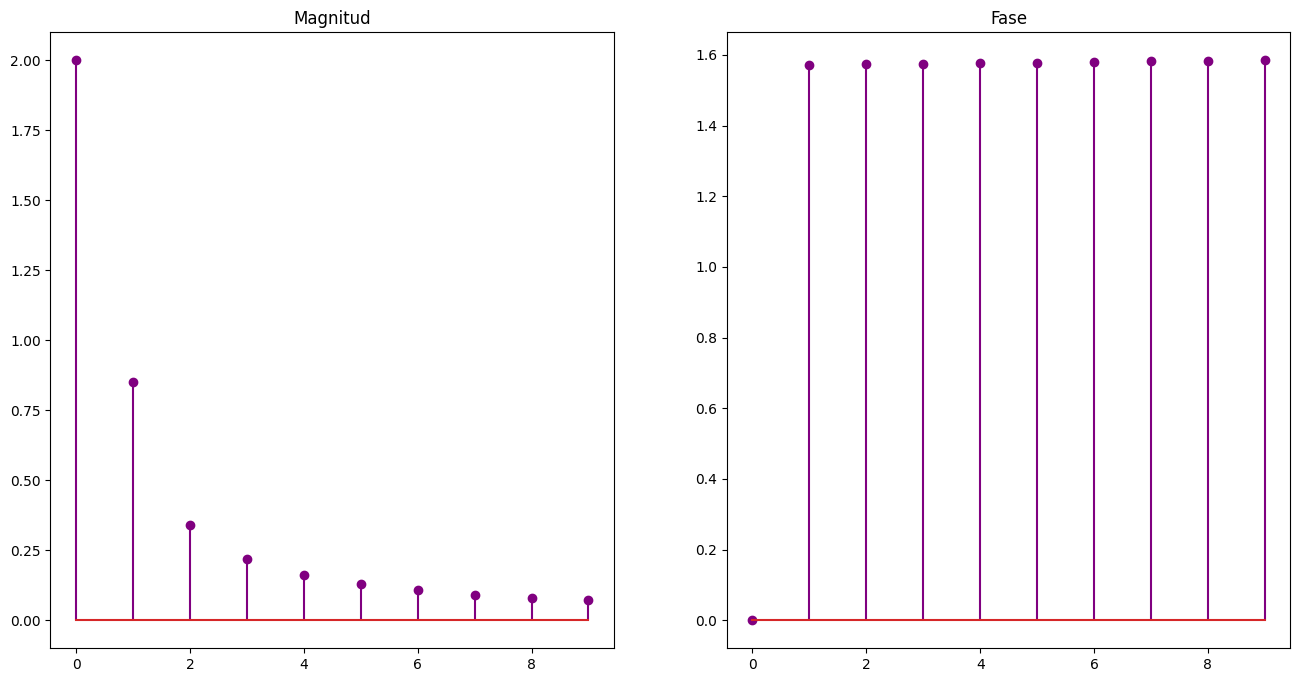

In [20]:
#Coeficientes de la serie de Fourier
plt.figure(figsize=(16,8))
a = np.fft.fft(x1)/len(x1) #obteniendo los coeficientes de la serie de Fourier
a1 = a[:10] #toma los 10 primeros elementos de a
magnitud = np.abs(a1) #magnitud
fase = np.angle(a1) #fase
plt.subplot(121)
plt.stem(magnitud, "purple")
plt.title("Magnitud")
plt.subplot(122)
plt.stem(fase, "purple")
plt.title("Fase")

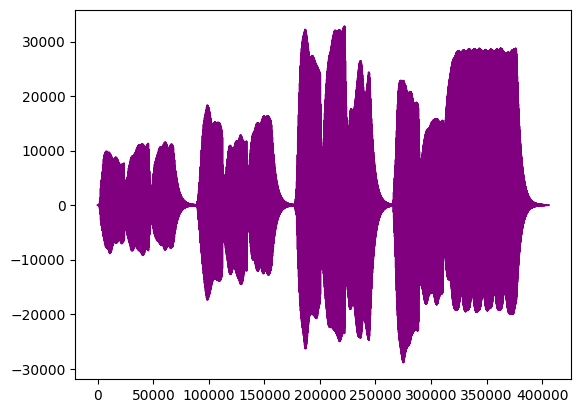

In [22]:
#Sonido de un violonchelo y señal graficada.
from scipy.io.wavfile import read
from IPython.display import Audio
sr, x = read("/content/cello.wav")
t=np.arange(0,len(x))
plt.plot(x, "purple") #grafica el audio y luego ten un pedazo del audio y graficar(coef.fourier)
Audio(x, rate=sr)

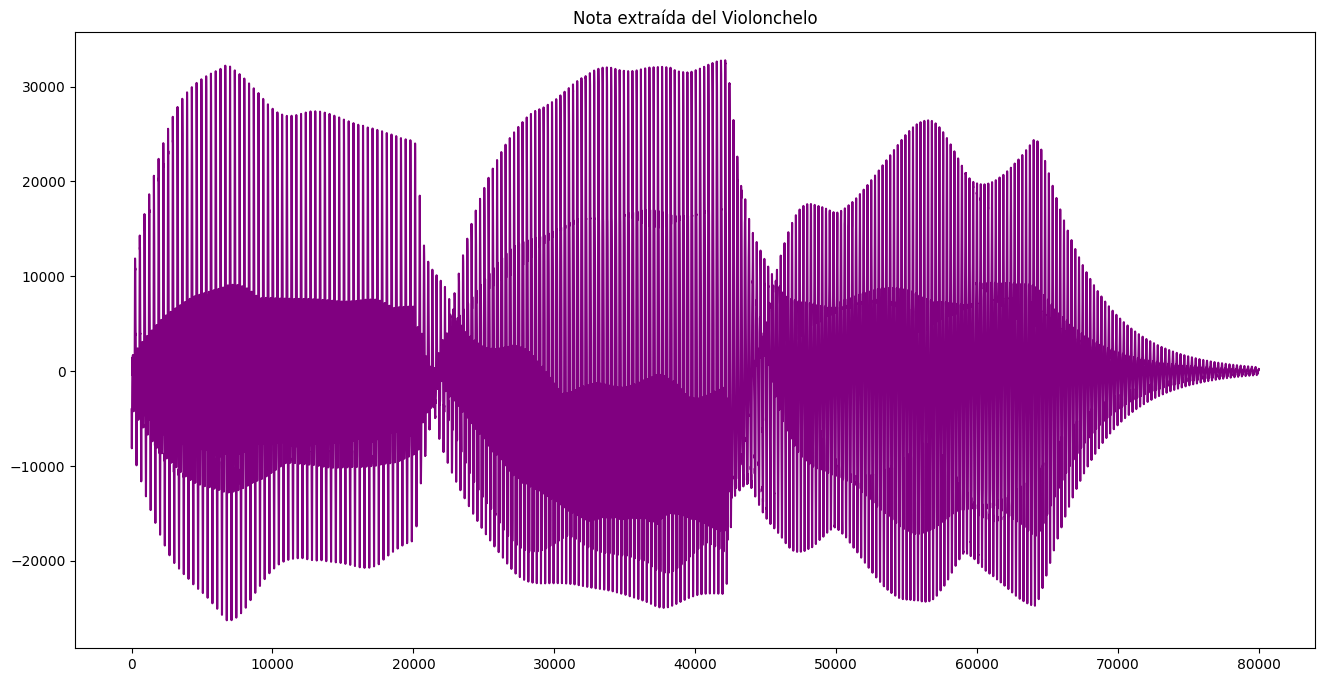

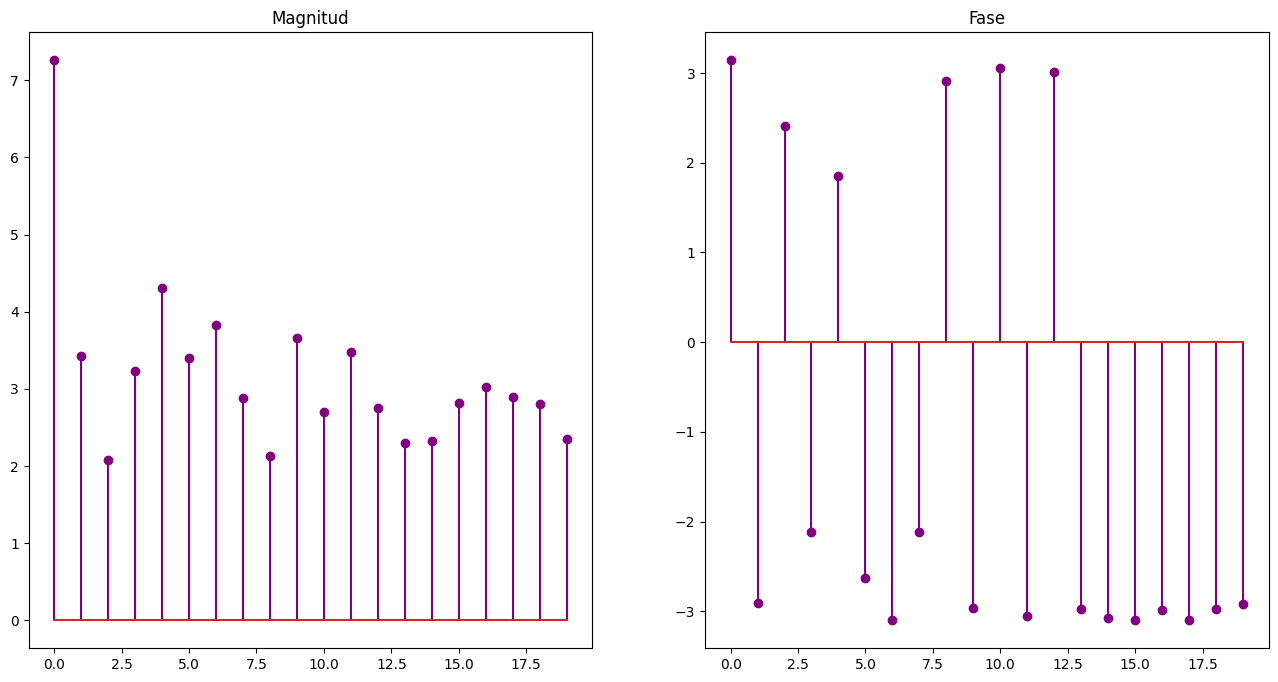

In [23]:
#Nota extraída de la señal del violonchelo.
nota = x[180000:260000] #nota seleccionada
plt.figure(figsize=(16,8))
plt.plot(nota, "purple")
plt.title("Nota extraída del Violonchelo")
plt.show()
periodo = nota[:2*sr] #vector con uno de los períodos de la nota seleccionada, T=2 segundos
a = np.fft.fft(periodo)/len(periodo) #calculando los coeficientes de la serie de Fourier
a1 = a[:20] #20 primeros coeficientes
magnitud = np.abs(a1)
fase = np.angle(a1)
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.stem(magnitud, "purple")
plt.title("Magnitud")
plt.subplot(122)
plt.stem(fase, "purple")
plt.title("Fase")
plt.show()

**Parte 2. Funciones simbólicas.**

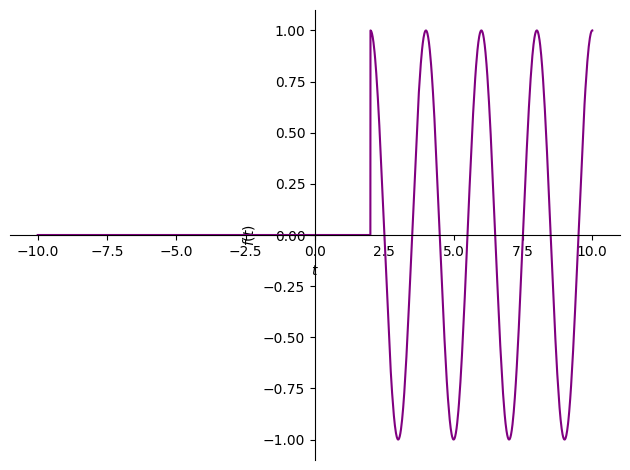

In [24]:
#Se define t (variable simbólica)
import sympy as sym
t = sym.Symbol('t')
x = sym.cos(sym.pi*t)*sym.Heaviside(t-2) #sym.Heaviside es el escalón unitario
p = sym.plotting.plot(x, line_color = "purple") #gráfica

In [6]:
#Transformada de Fourier de la señal.
from sympy.abc import k
X = sym.fourier_transform(x,t,k)
X

-2*I*k*exp(-4*I*pi*k)/(pi*(4*k**2 - 1))

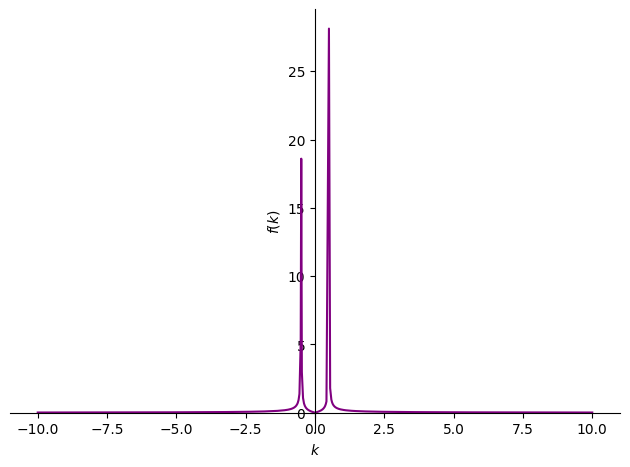

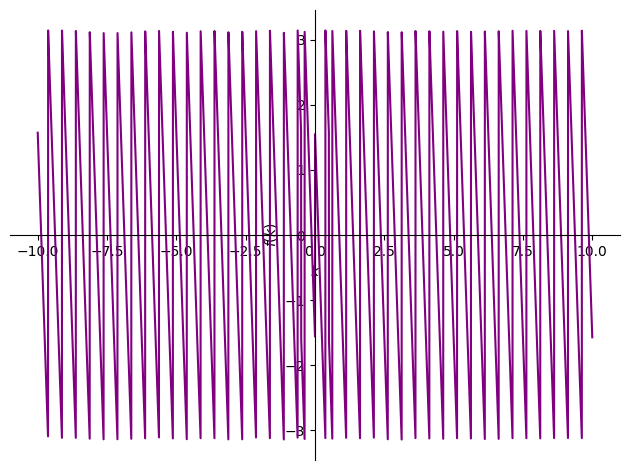

In [7]:
#Magnitud y fase señal.
p = sym.plotting.plot(sym.Abs(X),line_color = "purple")
p = sym.plotting.plot(sym.arg(X),line_color = "purple")

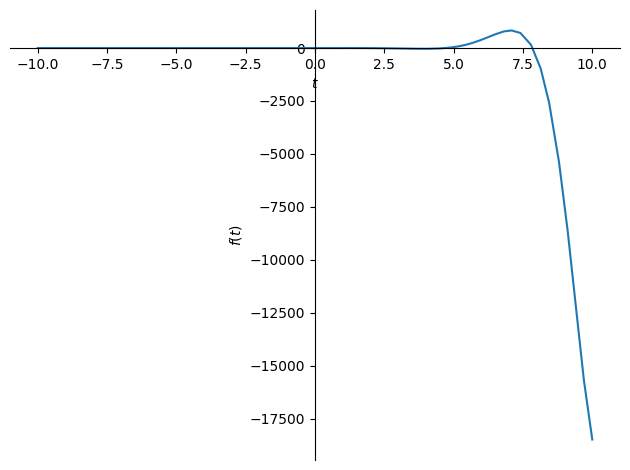

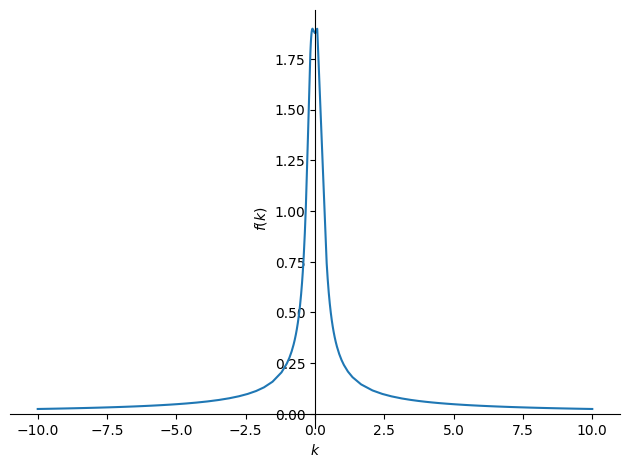

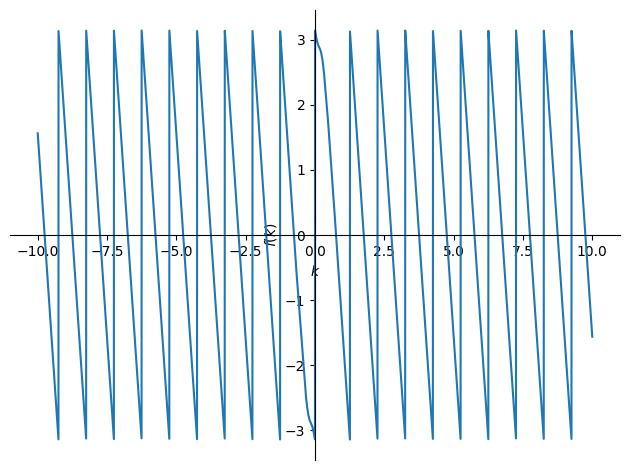

-I*((cos(2*pi*k - 1 + I) - sinh(I*(2*pi*k - 1 + I)))*(2*pi*k + 1 + I) + (cos(2*pi*k + 1 + I) - sinh(I*(2*pi*k + 1 + I)))*(2*pi*k - 1 + I))/(2*(2*pi*k - 1 + I)*(2*pi*k + 1 + I))

In [8]:
#Ejemplo 2 definiendo señales.
x0 = sym.exp(t)*sym.cos(t)*sym.Heaviside(t-1) #sym.Heaviside es el escalón unitario
p = sym.plotting.plot(x0) #gráfica

#Transformada de Fourier.
L = sym.fourier_transform(x0,t,k)

#Magnitud y fase.
p = sym.plotting.plot(sym.Abs(L))
p = sym.plotting.plot(sym.arg(L))
L

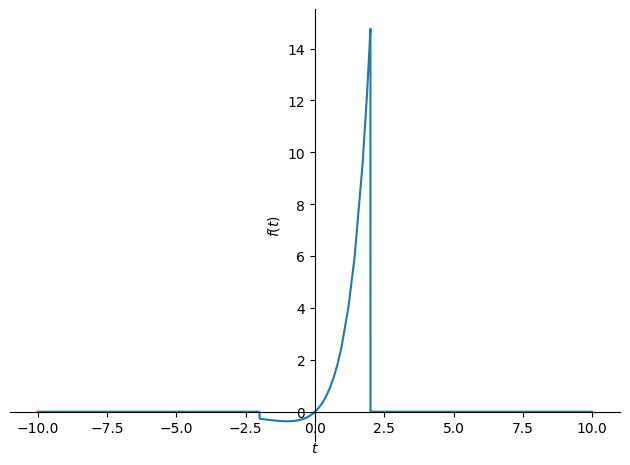

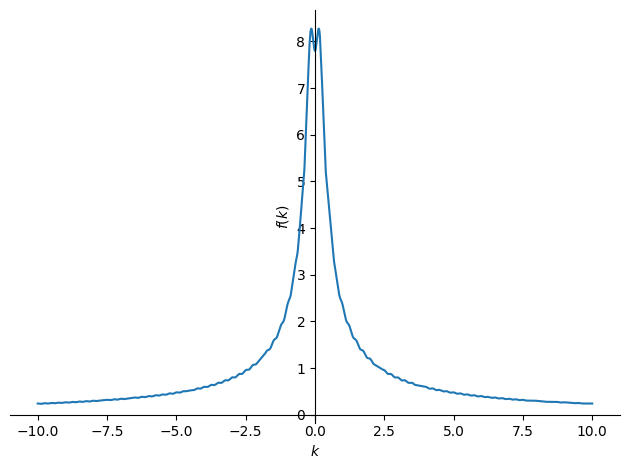

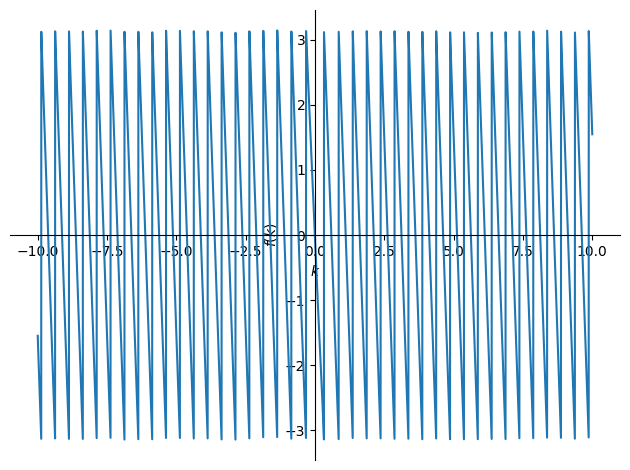

(4*I*pi*k*exp(8*I*pi*k) + 4*I*pi*k*exp(4) - 3*exp(8*I*pi*k) - exp(4))*exp(-4*I*pi*k - 2)/(4*pi**2*k**2 + 4*I*pi*k - 1)

In [9]:
#Ejemplo 3 definiendo señales.
x2 = t*sym.exp(t)*(sym.Heaviside(t+2)-sym.Heaviside(t-2)) #sym.Heaviside es el escalón unitario
p = sym.plotting.plot(x2) #gráfica

#Transformada de Fourier.
W = sym.fourier_transform(x2,t,k)

#Magnitud y fase.
p = sym.plotting.plot(sym.Abs(W))
p = sym.plotting.plot(sym.arg(W))
W

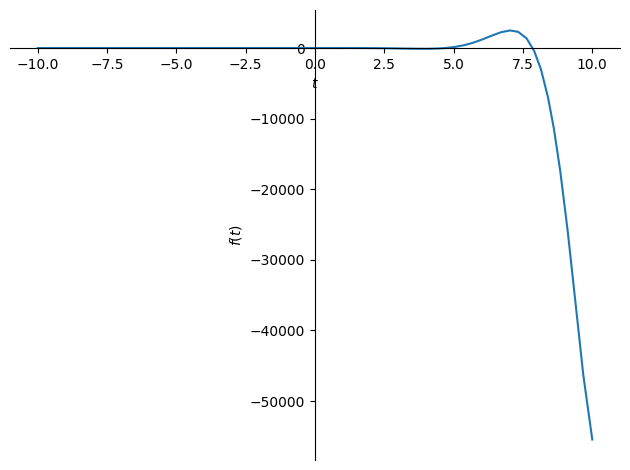

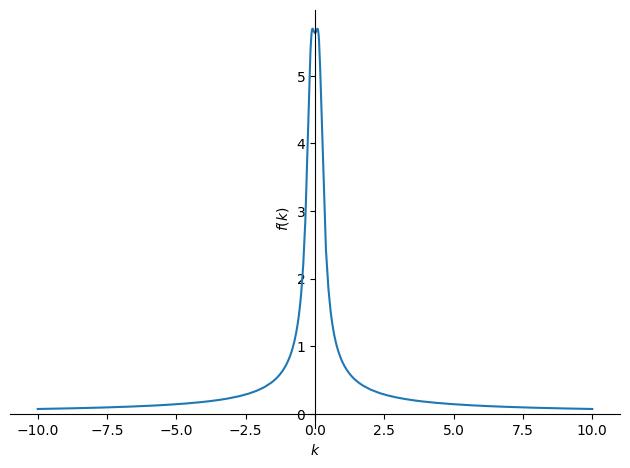

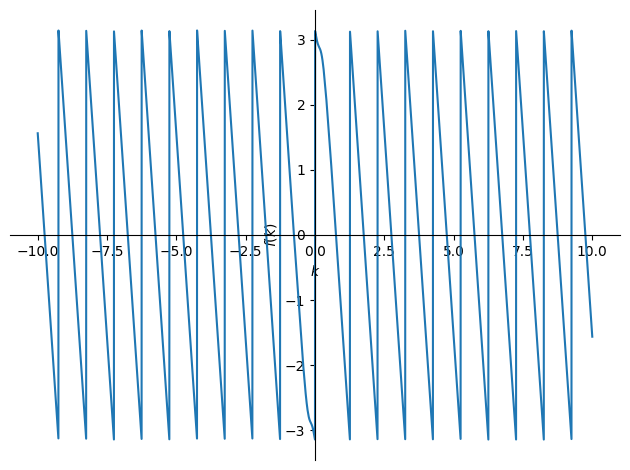

-3*I*((cos(2*pi*k - 1 + I) - sinh(I*(2*pi*k - 1 + I)))*(2*pi*k + 1 + I) + (cos(2*pi*k + 1 + I) - sinh(I*(2*pi*k + 1 + I)))*(2*pi*k - 1 + I))/(2*(2*pi*k - 1 + I)*(2*pi*k + 1 + I))

In [10]:
# Ejemplo 4 definiendo señales: 3*𝑥0(𝑡).
x3 = 3*(sym.exp(t)*sym.cos(t)*sym.Heaviside(t-1)) #sym.Heaviside es el escalón unitario
p = sym.plotting.plot(x3) #gráfica

#Transformada de Fourier.
H = sym.fourier_transform(x3,t,k)

#Magnitud y fase.
p = sym.plotting.plot(sym.Abs(H))
p = sym.plotting.plot(sym.arg(H))
H

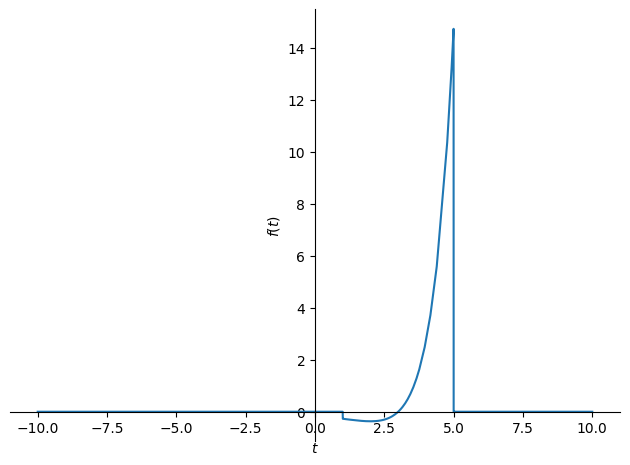

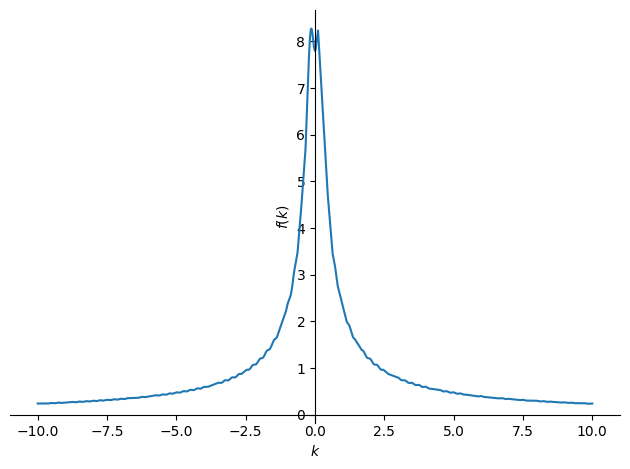

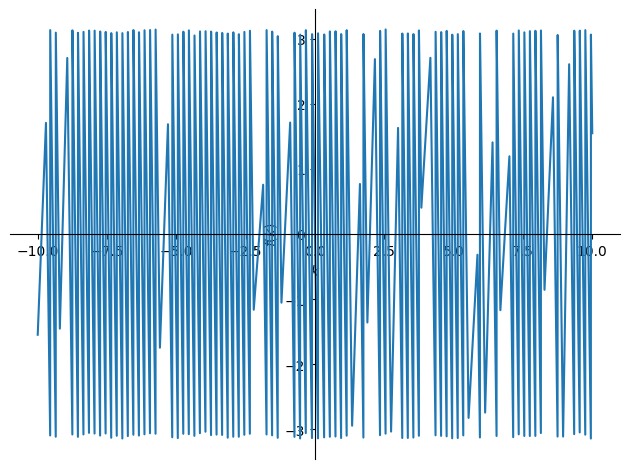

(4*I*pi*k*exp(8*I*pi*k) + 4*I*pi*k*exp(4) - 3*exp(8*I*pi*k) - exp(4))*exp(-10*I*pi*k - 2)/(4*pi**2*k**2 + 4*I*pi*k - 1)

In [11]:
#Ejemplo 5 definiendo señales. Desplace la señal 𝑥2(𝑡) para obtener 𝑥4=𝑥2(𝑡 − 3)
x4 = x2.subs(t, t - 3) #desplazando la señal para obtener x4
p = sym.plotting.plot(x4) #gráfica

#Transformada de Fourier.
Z = sym.fourier_transform(x4,t,k)

#Magnitud y fase.
p = sym.plotting.plot(sym.Abs(Z))
p = sym.plotting.plot(sym.arg(Z))
Z

**IV. Análisis de resultados.**

In [26]:
#1.
#Hallando la frecuencia fundamental de la nota escogida
fft = np.fft.fft(nota) #transformada de Fourier
frecuencias = np.fft.fftfreq(len(nota), 1/sr) #obtención de frecuencias
idx = np.argmax(np.abs(fft[:len(fft)//2])) #índice de pico máximo en las frecuencias positivas
frecuencia_fundamental = frecuencias[idx] #frecuencia fundamental
print("La frecuencia fundamental es: ", frecuencia_fundamental, "Hz")
print("Por lo tanto la nota musical a la que corresponde esta frecuencia es aproximadamente Mi en la octava 3")

La frecuencia fundamental es:  164.2725 Hz
Por lo tanto la nota musical a la que corresponde esta frecuencia es aproximadamente Mi en la octava 3


La magnitud y fase de las transformadas de fourier realizadas en la señal x0 con respecto a su transformación al multiplicarla por un escalar, en este caso 3, no significan un gran cambio. Las gráficas de magnitud y fase se ven iguales en x0 y en x3.

Por otro lado, en el caso de la señal x2 y la señal x4, las gráficas de magnitud de ambas señales son iguales. Sin embargo, es notorio el cambio en las gráficas de fase de las señales. Para la señal x4 se ven mayor cantidad de líneas en su gráfica.

**V. Conclusiones.**

A través de este informe, se ha demostrado la utilidad de Python y sus librerías para el análisis de señales. Se ha visto cómo la serie de Fourier puede descomponer una señal en sus componentes de frecuencia, proporcionando una visión detallada de su estructura. Además, se pudo observar cómo las transformadas de Fourier pueden ser utilizadas para analizar señales no periódicas, revelando información sobre su comportamiento en el dominio de la frecuencia. Finalmente, se logró hacer un análisis de cómo ciertas modificaciones en las señales, como la multiplicación por una constante o el desplazamiento en el tiempo, pueden afectar sus espectros de frecuencia. Estos hallazgos subrayan la importancia de estas herramientas para el análisis de señales y sistemas.

**VI. Referencias.**

[1] OPPENHEIM, A. V. (1998). SEÑALES Y SISTEMAS (2a. ed.). MEXICO: PRENTICE-HALL/HISPANOAMERICANA.

[2] Transformadas de Fourier. (s/f). Mathworks.com. Recuperado el 7 de abril de 2024, de https://es.mathworks.com/help/matlab/math/fourier-transforms.html

[3] Proakis, J. G., & Manolakis, D. K. (1996). “Digital Signal Processing: Principles, Algorithms, and Applications” (3rd Edition). Prentice Hall.

[4] Martínez, M. (2021, mayo 12). ¿Qué es la transformada de Fourier y para qué sirve? Nobbot. https://www.nobbot.com/que-es-la-transformada-de-fourier-y-para-que-sirve/

